# Issue #4: understand data

In [1]:
import pandas as pd
import re

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

### Profiles DF

In [ ]:
df_profiles = pd.read_csv("../data/raw/data_set_phase1/profiles.csv")

There are no null values

In [44]:
df_profiles.isnull().sum().sum()

0

In [4]:
df_profiles.sample(5)

,pid,p0,p1,p2,p3,p4,p5,p6,p7,p8,...,p56,p57,p58,p59,p60,p61,p62,p63,p64,p65
51901,118235,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
51381,192160,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38535,185129,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30656,194628,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45135,190926,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
df_profiles.shape

(63090, 67)

63k profiles 

### Queries DF

In [2]:
df_queries = pd.read_csv("../data/raw/data_set_phase1/train_queries.csv")

In [6]:
df_queries.shape

(500000, 5)

In [45]:
# 163k queries are done by anonymous users
df_queries.isnull().sum()

sid              0
pid         163979
req_time         0
ox               0
oy               0
dx               0
dy               0
dtype: int64

In [6]:
df_queries.sample(5)

,sid,pid,req_time,o,d
185894,2246095,170760.0,2018-10-13 17:56:32,"116.45,39.83","116.45,39.87"
113821,1667349,195309.0,2018-10-23 13:56:40,"116.35,39.91","116.40,39.85"
14032,5055,NaN,2018-11-10 08:37:45,"116.37,39.94","116.00,40.35"
383005,1028360,NaN,2018-11-27 20:05:19,"116.36,39.87","116.61,40.07"
215254,2325682,160622.0,2018-10-25 13:08:04,"116.59,40.12","116.43,40.07"


In [7]:
df_queries.shape

(500000, 5)

In [8]:
df_queries.dtypes

sid           int64
pid         float64
req_time     object
o            object
d            object
dtype: object

In [9]:
df_queries.describe()

,sid,pid
count,5.000000e+05,336021.000000
mean,1.762560e+06,158240.721684
std,1.015331e+06,33720.115235
min,2.000000e+00,100000.000000
25%,8.122398e+05,127774.000000
50%,1.848410e+06,161617.000000
75%,2.662461e+06,187360.000000
max,3.396588e+06,216977.000000


req_time, o and d are considered objets. Let's turn them into floats

In [3]:
df_queries[['ox','oy']] = df_queries.o.str.split(",",expand=True,).astype(float)
df_queries[['dx','dy']] = df_queries.d.str.split(",",expand=True,).astype(float)
df_queries = df_queries.drop('o', 1)
df_queries = df_queries.drop('d', 1)

In [11]:
df_queries.sort_values('req_time')

,sid,pid,req_time,ox,oy,dx,dy
13833,753082,101467.0,2018-10-01 00:00:10,116.34,39.90,116.34,39.90
397272,756507,171074.0,2018-10-01 00:00:11,116.58,39.92,116.27,40.00
193575,739221,141511.0,2018-10-01 00:00:22,116.50,40.03,116.42,39.84
153511,776916,142228.0,2018-10-01 00:00:46,116.51,39.87,116.39,39.91
469812,762813,106323.0,2018-10-01 00:00:47,116.35,39.98,116.35,39.98
356571,767905,108389.0,2018-10-01 00:00:50,116.43,39.97,116.39,39.91
275749,734837,102535.0,2018-10-01 00:00:55,116.57,40.01,116.39,39.91
279000,735700,207027.0,2018-10-01 00:01:47,116.25,39.92,116.00,40.35
354178,782126,NaN,2018-10-01 00:02:04,116.33,39.92,116.43,39.94
341136,773765,172900.0,2018-10-01 00:02:23,116.26,39.89,116.39,39.90


In [8]:
df_queries['req_time'] = pd.to_datetime(df_queries['req_time'])
df_queries['day_of_week'] = df_queries['req_time'].dt.day_name()
df_queries['req_date'] = df_queries['req_time'].dt.strftime('%m-%d')
df_queries['req_hour'] = df_queries['req_time'].dt.hour
df_queries['req_minute'] = df_queries['req_time'].dt.minute

In [9]:
df_queries.sample(5)

,sid,pid,req_time,ox,oy,dx,dy,day_of_week,req_date,req_hour,req_minute
314521,2163093,100266.0,2018-10-19 16:16:45,116.61,39.92,116.61,39.92,Friday,10-19,16,16
197699,1082862,NaN,2018-11-08 15:30:39,116.09,39.94,116.17,39.92,Thursday,11-08,15,30
302766,1640820,161001.0,2018-10-03 13:44:00,116.37,39.91,116.39,39.91,Wednesday,10-03,13,44
325118,2767249,NaN,2018-10-18 16:33:25,116.37,39.86,116.35,39.87,Thursday,10-18,16,33
364749,1607562,166088.0,2018-10-03 11:33:17,116.31,39.89,116.33,39.94,Wednesday,10-03,11,33


In [8]:
reg_day = re.compile("-(\d\d) ")
reg_month = re.compile("-(\d\d)-")
def preprocess_time(row):
    day = int(reg_day.search(row.req_time).group(1))
    month = int(reg_month.search(row.req_time).group(1))
    if month > firstmonth:
        day += 30*(month - firstmonth)
    return day

In [9]:
firstmonth = 10
df_queries['req_time'] = df_queries.apply(preprocess_time, axis=1)

In [10]:
df_sorted = df_queries.sort_values('req_time')
df_sorted.sample(5)

,sid,pid,req_time,o,d
208854,2026521,125147.0,14,"116.28,39.96","116.26,39.94"
216348,597374,NaN,41,"116.45,39.96","116.38,39.97"
493203,2531445,162208.0,49,"116.43,39.85","116.44,39.87"
365066,1960594,117394.0,11,"116.35,39.98","116.36,39.99"
122042,1826345,NaN,59,"116.45,39.88","116.45,39.87"


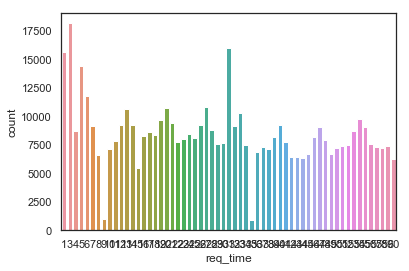

In [15]:
sns.countplot(df_queries.req_time)

#### Queries per day of the week

Right now we have queries per day, let's get some number for average queries every day of the week

In [18]:
queries_day = df_queries.groupby(['req_time']).size()

In [31]:
queries_weekday = [0]*7
num_queries_weekday = [0]*7

for i, v in queries_day.items():
    queries_weekday[(i-1) % 7] = v
    num_queries_weekday[(i-1) % 7] += 1
    
for i in range(7):
    queries_weekday[i] //= num_queries_weekday[i]

queries_weekday

[816, 907, 825, 695, 1224, 1129, 941]

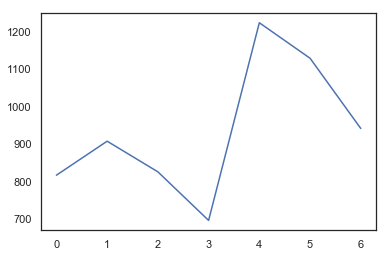

In [35]:
plt.plot(queries_weekday)

#### Statistics of df_queries

More info in `reports/EDA.md`

In [16]:
df_queries.describe()

,sid,pid,req_time,ox,oy,dx,dy
count,5.000000e+05,336021.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.762560e+06,158240.721684,29.085754,116.387939,39.940147,116.384527,39.944149
std,1.015331e+06,33720.115235,17.464828,0.116205,0.102066,0.124920,0.109880
min,2.000000e+00,100000.000000,1.000000,115.470000,39.460000,115.440000,39.460000
25%,8.122398e+05,127774.000000,14.000000,116.320000,39.890000,116.320000,39.890000
50%,1.848410e+06,161617.000000,28.000000,116.380000,39.920000,116.390000,39.920000
75%,2.662461e+06,187360.000000,44.000000,116.440000,39.990000,116.440000,39.990000
max,3.396588e+06,216977.000000,60.000000,117.290000,40.970000,117.370000,40.960000


#### User analysis

Analyze queries made by each user

In [38]:
df_most_pop_users = df_queries['pid'].value_counts()

In [39]:
# there are 46k users
df_most_pop_users.shape

(46191,)

In [40]:
df_most_pop_users.describe()

count    46191.000000
mean         7.274599
std         54.686020
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       6094.000000
Name: pid, dtype: float64

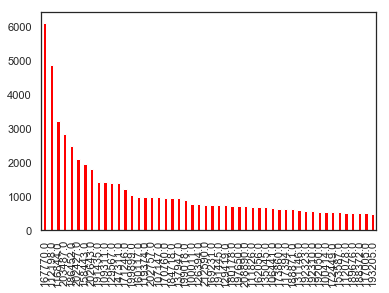

In [19]:
df_most_pop_users.head(50).plot(kind='bar',x='user IDs',y='# queries',color='red')
plt.show()

In [43]:
# number of profiles with one or two queries
df_most_pop_users[df_most_pop_users < 5].count()

46191

### Clicks DF

In [51]:
df_clicks = pd.read_csv("../data/raw/data_set_phase1/train_clicks.csv")

In [52]:
df_clicks.isnull().sum()

sid           0
click_time    0
click_mode    0
dtype: int64

In [53]:
df_clicks.shape

(453336, 3)

In [55]:
df_clicks.sample(5)

,sid,click_time,click_mode
189493,475347,2018-11-09 10:21:24,2
364951,130367,2018-10-08 18:01:04,9
224640,787738,2018-10-01 13:10:26,7
308882,1552263,2018-11-28 22:08:52,11
209797,41066,2018-11-10 20:12:30,7


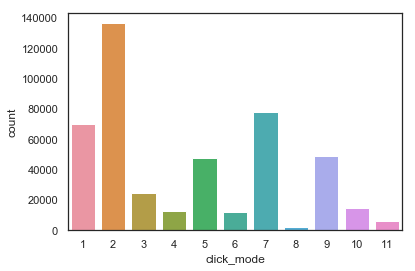

In [56]:
sns.countplot(df_clicks.click_mode)

### Plans DF

In [57]:
df_plans = pd.read_csv("../data/raw/data_set_phase1/train_plans.csv")

In [58]:
df_plans.isnull().sum()

sid          0
plan_time    0
plans        0
dtype: int64

In [59]:
df_plans.sample(5)

,sid,plan_time,plans
291047,951921,2018-10-24 08:35:26,"[{""distance"": 22698, ""price"": 500, ""eta"": 5117..."
9911,681035,2018-11-15 16:08:16,"[{""distance"": 5706, ""price"": 200, ""eta"": 3230,..."
326355,175333,2018-10-20 11:18:42,"[{""distance"": 26594, ""price"": 700, ""eta"": 3604..."
230471,1309499,2018-11-06 16:49:22,"[{""distance"": 39434, ""price"": 700, ""eta"": 6648..."
74403,3141632,2018-10-26 19:37:26,"[{""distance"": 23809, ""price"": 700, ""eta"": 4003..."


In [60]:
df_plans.shape

(491054, 3)